In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# Import the Dataset
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

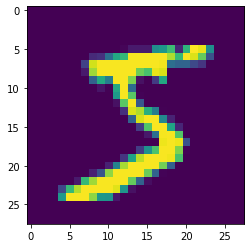

In [7]:
plt.imshow(single_image)

### Exploring the Labels

In [8]:
# Exploring Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
# One-Hot Encoding example
to_categorical(y_train).shape

(60000, 10)

In [11]:
# One-Hot Encoding
y_cat_test = to_categorical(y_test, 10)    # 10 classes
y_cat_train = to_categorical(y_train, 10)  # 10 classes

In [12]:
print(single_image.max())
print(single_image.min())

255
0


In [13]:
# Scale the values
x_train = x_train/255
x_test = x_test/255

In [14]:
scaled_single_image = x_train[0]

In [15]:
scaled_single_image.max()

1.0

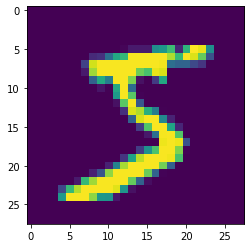

In [16]:
plt.imshow(scaled_single_image)

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
# We need to add another dimension to our data to represent the single color channel
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

## Model Creation

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))  # Multiclass -> softmax

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])  # keras.io/metrics

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [21]:
model.fit(x_train, y_cat_train, 
            epochs=20, 
            validation_data=(x_test, y_cat_test),
            callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1369 - accuracy: 0.9589 - val_loss: 0.0513 - val_accuracy: 0.9834
Epoch 2/20
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0484 - val_accuracy: 0.9843
Epoch 3/20
60000/60000 [==============================] - 19s 315us/sample - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0633 - val_accuracy: 0.9818


## Model Evaluation

In [22]:
# Because we kept track of 'accuracy', we have another column!
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136862,0.958850,0.051295,0.9834
1,0.046710,0.985200,0.048379,0.9843
2,0.029787,0.990433,0.063274,0.9818


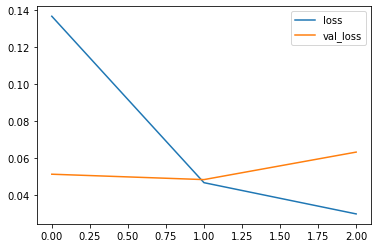

In [28]:
#metrics.plot()
# plot relative features against each other
metrics[['loss', 'val_loss']].plot();

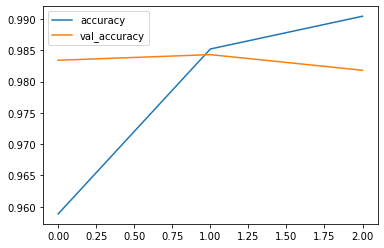

In [29]:
metrics[['accuracy','val_accuracy']].plot();

In [30]:
# Evaluation Test
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))


['loss', 'accuracy']
[0.06327361064653378, 0.9818]


In [32]:
# Predictions!
predictions = model.predict_classes(x_test)

In [33]:
# Remember shapes and datatypes
y_cat_test.shape

(10000, 10)

In [34]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       1.00      0.92      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [36]:
confusion_matrix(y_test, predictions)

array([[ 974,    1,    2,    1,    0,    0,    2,    0,    0,    0],
       [   0, 1131,    0,    2,    0,    1,    0,    0,    1,    0],
       [   0,    3, 1024,    0,    1,    0,    0,    4,    0,    0],
       [   0,    0,    2, 1002,    0,    4,    0,    2,    0,    0],
       [   0,    2,    0,    0,  975,    0,    4,    1,    0,    0],
       [   1,    0,    0,    8,    0,  879,    4,    0,    0,    0],
       [   7,    3,    0,    1,    1,    1,  944,    0,    1,    0],
       [   0,    2,    6,    0,    0,    0,    0, 1020,    0,    0],
       [   3,    2,    9,    6,    0,    2,    2,    5,  944,    1],
       [   2,    7,    3,   18,   22,   14,    0,   16,    2,  925]],
      dtype=int64)

In [39]:
#plt.figure(figsize=(9,5))
#sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

In [40]:
single_number = x_test[0]

In [41]:
single_number.shape

(28, 28, 1)

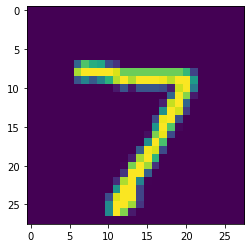

In [42]:
plt.imshow(single_number.reshape(28,28))

In [43]:
# num_images, width, height, color_channels
model.predict_classes(single_number.reshape(1,28,28,1))

array([7], dtype=int64)